# Felipe Castillo
# Data Preparation
# Milestone 4
# 2/18/2022

The plan for this milestone is to retrieve data from a Wikipedia table. The table that will be targeted is the House of Representative table. There are some data points that need to be adjusted. Age come in as (age x) , regex will be used to extract the age. The headers will be adjusted with different names for usability. I will then check the average age of congress after the age is mapped to a dictionary. Also there are some variables that seem to be wrong and need to be validated.

In [1]:
import requests
import wikipedia as wp
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
from urllib.request import urlopen
from scipy.stats import iqr
import numpy as np
import json
import os
import time
import re


os.chdir("C:\DataScience_DSC_540\MilestoneFolder")



Step 1: Access the table from the wikipedia house of representatives. The html will be decoded and produce a table of congress people.

In [10]:



def wikipedia_representatives():
    
    #Url
    wiki_url = 'https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives'
    
    #response can fail, adding a try catch for connectivity
    try:
        response = requests.get(wiki_url)
        #using wikipedia packe to pull table
        html = wp.page('List of current members of the United States House of Representatives').html().encode("UTF-8")
        
        #pull exact table with congress information
        df_html = pd.read_html(html)[7]

        df_wiki = pd.DataFrame(df_html)
        
        return df_wiki

    except:
        print("Could note retieve website.")

In [3]:

#mapping function to wiki_df
wiki_df = wikipedia_representatives()

In [4]:
#checking null, adjustement names to be made, 
wiki_df.head(20)

,District,Member,Party,Party.1,Prior experience,Education,Assumed office,Residence,Born[2]
0,Alabama 1,Jerry Carl,NaN,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,(age 63)
1,Alabama 2,Barry Moore,NaN,Republican,Alabama House of Representatives,Enterprise State Community College (AS)Auburn ...,2021,Enterprise,(age 55)
2,Alabama 3,Mike Rogers,NaN,Republican,Calhoun County CommissionerAlabama House of Re...,"Jacksonville State University (BA, MPA)Birming...",2003,Anniston[3],(age 63)
3,Alabama 4,Robert Aderholt,NaN,Republican,Haleyville Municipal Judge,University of North AlabamaBirminghamâSouthe...,1997,Haleyville,(age 56)
4,Alabama 5,Mo Brooks,NaN,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,(age 67)
5,Alabama 6,Gary Palmer,NaN,Republican,Policy analyst,University of Alabama (BS),2015,Hoover,(age 67)
6,Alabama 7,Terri Sewell,NaN,Democratic,Attorney,"Princeton University (BA)St Hilda's College, O...",2011,Birmingham,(age 57)
7,Alaska at-large,Don Young,NaN,Republican,Ship captainMayor of Fort YukonAlaska SenateAl...,"Yuba CollegeCalifornia State University, Chico...",1973 (special),Fort Yukon,(age 88)
8,Arizona 1,Tom O'Halleran,NaN,Democratic,Arizona Senate,Lewis UniversityDePaul University,2017,Sedona,(age 76)
9,Arizona 2,Ann Kirkpatrick,NaN,Democratic,U.S. HouseArizona House of Representatives,"University of Arizona (BA, JD)",2019,Tucson,(age 71)


Step 2: Updating header, for example the column says born but the value is of age and be confusing to other people. Also making the values easier to read.

In [5]:
#Updating some header names 
#making them easier to call

#swapped party1 and poli_party , party will be removed due to null values

header_name = ['District','Candidate','Party1','Poli_Party','Experience','Cand_Education','Start_Date','Residence','Age']


#Take each name in heards and replace headrs in df 
wiki_df.columns = [x for x in header_name]






In [6]:
# Removing Null Feild party one
# All Values in the data set where null

#droping null values for beetter reablity 

wiki_df.drop(columns=['Party1'],axis=1, inplace=True)


wiki_df.head()


,District,Candidate,Poli_Party,Experience,Cand_Education,Start_Date,Residence,Age
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,(age 63)
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)Auburn ...,2021,Enterprise,(age 55)
2,Alabama 3,Mike Rogers,Republican,Calhoun County CommissionerAlabama House of Re...,"Jacksonville State University (BA, MPA)Birming...",2003,Anniston[3],(age 63)
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North AlabamaBirminghamâSouthe...,1997,Haleyville,(age 56)
4,Alabama 5,Mo Brooks,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,(age 67)


Step 3: age variables in Age column is in a weird none numerical value. This would not help when attmepting to find the value of age. Therefore age variable needs to reformatted from (age 68) to 68.

In [7]:
# Age is saved as (age 56) in data feild taking 

#setting empty arry for age values
filter_ages = []
#taking all age
for age in wiki_df['Age']:
    #step -------- taking regex and cutting out age and ()
    n=re.findall('[0-9]+',age)
    #Returned allo values 
    for number in n:
        filter_ages.append(number)

Step 4: Now that the numbers are in a numerical value, I want to fidn the occurances of age to see how old the congress me are. Take the unique value of each age.

In [8]:
unique_age = []
for age in filter_ages:
    if age not in unique_age and age.isnumeric():
        unique_age.append(age)
print(unique_age)

['63', '55', '56', '67', '57', '88', '76', '71', '74', '59', '42', '51', '65', '54', '61', '58', '77', '70', '35', '69', '81', '75', '41', '45', '79', '52', '44', '68', '85', '47', '49', '53', '80', '83', '48', '64', '66', '43', '60', '33', '37', '73', '78', '39', '34', '72', '50', '62', '38', '84', '40', '82', '46', '32', '26', '86']


In [12]:
# find words with their count


#setting dic to empty 
agedic = {}
# Getting unique day values
for age in unique_age:
    #setting a current age values
    current_age = age
    count = 0
    #if an occurance of the unique value add counter
    for age_can in filter_ages:
        if(current_age ==  age_can):
            count = count + 1
            agedic[age] = count
#storing values in dictionary now I can map the data
        
print(agedic)
        
        
    


{'63': 15, '55': 14, '56': 15, '67': 13, '57': 13, '88': 1, '76': 5, '71': 12, '74': 13, '59': 14, '42': 6, '51': 9, '65': 13, '54': 5, '61': 13, '58': 18, '77': 5, '70': 9, '35': 3, '69': 9, '81': 3, '75': 7, '41': 8, '45': 12, '79': 3, '52': 10, '44': 3, '68': 17, '85': 2, '47': 6, '49': 6, '53': 8, '80': 4, '83': 1, '48': 12, '64': 9, '66': 12, '43': 13, '60': 17, '33': 2, '37': 8, '73': 8, '78': 2, '39': 5, '34': 5, '72': 6, '50': 11, '62': 10, '38': 5, '84': 1, '40': 2, '82': 1, '46': 6, '32': 1, '26': 1, '86': 1}


Step 5: Currently the age values are not sorted. The values and keys are set by the current order that the for each loop begins. If the first age is 90 , the 90 age will be mapped to count. This of course doesnt help when looking at frequncy. The dictionary has to be put in order. 

In [25]:
#Argument takes in dictionary and returns a list of tuples in order. 
#the data and futrue graphs will be more readable.
sorted_dictionary = sorted(agedic.items(), key=lambda x: x)

Step 6: Make a bar graph that shows frequency of age.

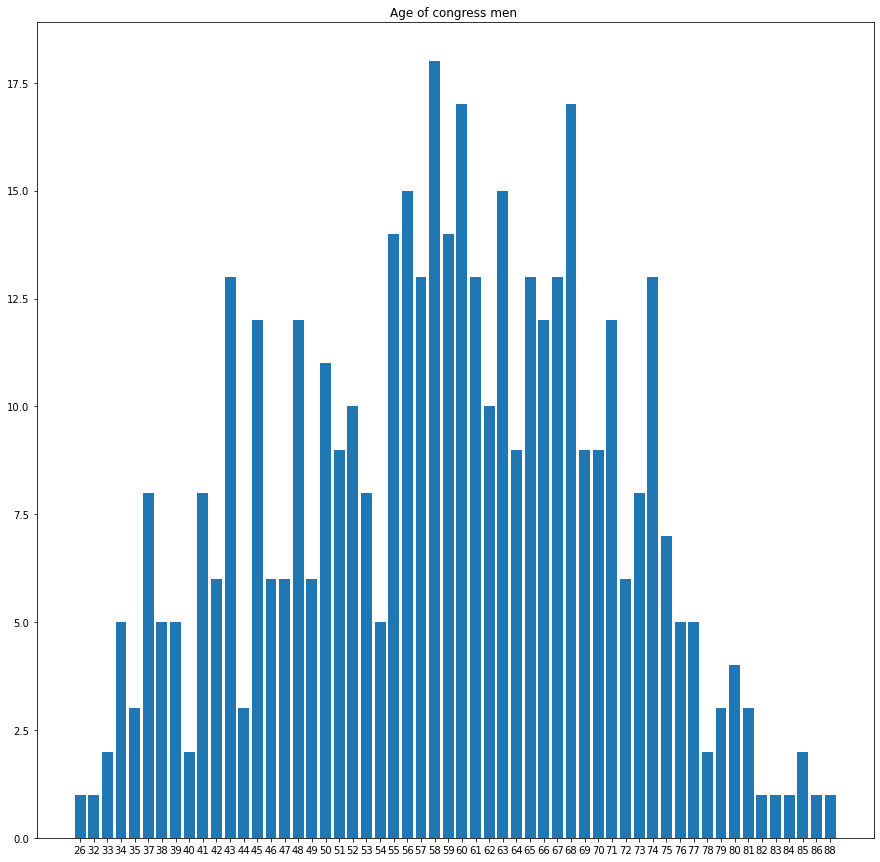

In [32]:
#sorted_dictionary 
#unpackinging sorted 
#seems like an amazing task to be 88 and in office
#At 23  I was still in school lol!



plt.figure(figsize=(15, 15))
plt.title("Age of congress men ")
plt.bar(*zip(*sorted_dictionary))
plt.show()


Step 7: Found it strange that the data did not contain a state column only district. Within those districts the data seems to be missing or worng inputs. I am taking a dictionary of states and seeing how many of them are correctly inputing by there district name. For example if the distric is Alabama 1 , the dictionary holds the intails and each iteration will check to see if its correct. If the value is correct the key will be returned. The count will be taken of values not correctly inserted by state.

In [88]:
wiki_df.shape[0]

435

In [54]:
# State dictionary copied from git hub on states 
#will be used to refactor state intailies as a way to keep a counter
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [87]:

state_list = []
for district in wiki_df['District']:
    # Looking at the first word in the var value example alabama 1 will only look at alabama excluding anything after the space 
    state =re.findall('[^\s]+',district)
    
    #checking state is in state dictionary 
    if (state[0] in states.values()):
        
        #looking through each item in dictionary 
        for key, value in states.items():
            #checking that state is in dictinary
            if state[0] == value:
    
                #adding to list
                state_list.append(key)
            
# The list returned contains each district that is inserted by a state value 
#each value after that is considered to be wrong
                
print(len(state_list))
    
    

364


In [90]:
# There are 71 values that are no in state number format
int(wiki_df.shape[0]-len(state_list))  

71